### Ali Darabi - 810100264
### Hesam Ramezanian - 810100248

# Data Science - Assignment 3

In [1]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc, countDistinct
from pyspark.sql.functions import year, month, to_date
from pyspark.sql.functions import split, explode
from pyspark.sql.functions import min, max, sum, avg
from pyspark.sql.functions import mean, stddev, round
from IPython.display import display, HTML
import numpy as np
display(HTML('<style>pre { white-space: pre !important; }</style>'))

In [2]:
def displayDataFrame(df, num_rows=10):
    print(f"Number of rows: {df.count()}")
    print("First few rows:")
    df.show(num_rows)

# <span style="color:Orange">Warm-Up!</span>

## <span style="color:Orange">Q1 :</span>

In [3]:
spark = SparkSession.builder.appName("StockAnalysis").getOrCreate()
stocksDataFrame = spark.read.csv("stocks.csv", header=True, inferSchema=True)

In [4]:
displayDataFrame(stocksDataFrame)

Number of rows: 1762
First few rows:
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.799

## <span style="color:Orange">Q2 :</span>

In [5]:
stocksDataFrame.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



## <span style="color:Orange">Q3 :</span>

In [6]:
filteredDataFrame = stocksDataFrame.filter(col("Close") < 500)
selectedDataFrame = filteredDataFrame.select("Open", "Close", "Volume")
displayDataFrame(selectedDataFrame)

Number of rows: 1359
First few rows:
+------------------+------------------+---------+
|              Open|             Close|   Volume|
+------------------+------------------+---------+
|        213.429998|        214.009998|123432400|
|        214.599998|        214.379993|150476200|
|        214.379993|        210.969995|138040000|
|            211.75|            210.58|119282800|
|        210.299994|211.98000499999998|111902700|
|212.79999700000002|210.11000299999998|115557400|
|209.18999499999998|        207.720001|148614900|
|        207.870005|        210.650002|151473000|
|210.11000299999998|            209.43|108223500|
|210.92999500000002|            205.93|148516900|
+------------------+------------------+---------+
only showing top 10 rows



## <span style="color:Orange">Q4 :</span>

In [7]:
filteredDataFrame = stocksDataFrame.filter((col("Open") > 200) & (col("Close") < 200))
displayDataFrame(filteredDataFrame)

Number of rows: 3
First few rows:
+----------+------------------+----------+----------+----------+---------+------------------+
|      Date|              Open|      High|       Low|     Close|   Volume|         Adj Close|
+----------+------------------+----------+----------+----------+---------+------------------+
|2010-01-22|206.78000600000001|207.499996|    197.16|    197.75|220441900|         25.620401|
|2010-01-28|        204.930004|205.500004|198.699995|199.289995|293375600|25.819922000000002|
|2010-01-29|        201.079996|202.199995|190.250002|192.060003|311488100|         24.883208|
+----------+------------------+----------+----------+----------+---------+------------------+



## <span style="color:Orange">Q5 :</span>

In [8]:
DfWithYearCol = stocksDataFrame.withColumn("Year", year(col("Date")))
displayDataFrame(DfWithYearCol)

Number of rows: 1762
First few rows:
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|Year|
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|2010|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|    

## <span style="color:Orange">Q6 :</span>

In [9]:
DfWithMinVolumeByYear = DfWithYearCol.groupBy("Year") \
                                .agg(min("Volume").alias("minVolume")) \
                                .select("Year", "minVolume")

displayDataFrame(DfWithMinVolumeByYear)

Number of rows: 7
First few rows:
+----+---------+
|Year|minVolume|
+----+---------+
|2015| 13046400|
|2013| 41888700|
|2014| 14479600|
|2012| 43938300|
|2016| 11475900|
|2010| 39373600|
|2011| 44915500|
+----+---------+



## <span style="color:Orange">Q7 :</span>

In [10]:
DfWithYearAndMonth = stocksDataFrame.withColumn("Year", year(col("Date"))) \
                              .withColumn("Month", month(col("Date")))

displayDataFrame(DfWithYearAndMonth)

Number of rows: 1762
First few rows:
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+-----+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|Year|Month|
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+-----+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|    1|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|    1|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|    1|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|2010|    1|
|2010-01-08|        210.299994|        212.000006|209.060005

In [11]:
maxLowByYearAndMonth = DfWithYearAndMonth.groupBy("Year", "Month") \
                                           .agg(max("Low").alias("maxLow")) \
                                           .select("Year", "Month", "maxLow")

displayDataFrame(maxLowByYearAndMonth)

Number of rows: 84
First few rows:
+----+-----+------------------+
|Year|Month|            maxLow|
+----+-----+------------------+
|2012|   10|        665.550026|
|2010|    7|        260.300003|
|2010|   12|        325.099991|
|2015|    2|        131.169998|
|2014|    4|        589.799988|
|2015|   12|        117.809998|
|2016|    7|            103.68|
|2016|   11|        111.400002|
|2012|    8| 673.5400089999999|
|2013|    2|473.24997699999994|
+----+-----+------------------+
only showing top 10 rows



## <span style="color:Orange">Q8 :</span>

In [12]:
highMeanAndStd = stocksDataFrame.agg(
    round(mean("High"), 2).alias("mean_high"),
    round(stddev("High"), 2).alias("std_dev_high")
)

displayDataFrame(highMeanAndStd)

Number of rows: 1
First few rows:
+---------+------------+
|mean_high|std_dev_high|
+---------+------------+
|   315.91|       186.9|
+---------+------------+



# <span style="color:Pink">Main Task</span>

In [13]:
spark = SparkSession.builder.appName("SpotifyAnalysis").getOrCreate()
spotifyDataFrame = spark.read.parquet("spotify.parquet")

In [14]:
spotifyDataFrame.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)



In [15]:
spotifyDataFrame = spotifyDataFrame.withColumn("release_date_converted", to_date(col("release_date"), "yyyy-MM-dd"))
spotifyDataFrame = spotifyDataFrame.drop("release_date")
spotifyDataFrame.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date_converted: date (nullable = true)



In [16]:
albumSongCounts = spotifyDataFrame.groupBy("album") \
                              .agg(countDistinct("name").alias("unique_song_count"))

topAlbumsWithHighestNumberOfSongs = albumSongCounts.orderBy(col("unique_song_count").desc()) \
                                 .limit(10) \
                                 .select("album", "unique_song_count")

displayDataFrame(topAlbumsWithHighestNumberOfSongs)

Number of rows: 10
First few rows:
+--------------------+-----------------+
|               album|unique_song_count|
+--------------------+-----------------+
|       Greatest Hits|             1749|
|                Live|              870|
|      The Collection|              335|
|          Super Hits|              327|
|          Love Songs|              325|
|Platinum & Gold C...|              300|
|         The Best Of|              280|
|RCA 100 Años de M...|              277|
|                  II|              277|
|     Handel: Messiah|              262|
+--------------------+-----------------+



In [17]:
topSongsWithHighestDuration = spotifyDataFrame.orderBy(col("duration_ms").desc()) \
                                 .limit(10) \
                                 .select("name", "duration_ms")

displayDataFrame(topSongsWithHighestDuration)

Number of rows: 10
First few rows:
+--------------------+-----------+
|                name|duration_ms|
+--------------------+-----------+
|Bargrooves Deluxe...|    6061090|
|Doctorow's Third Law|    6054655|
|       Gothic Lolita|    5764624|
|Bargrooves Deluxe...|    5713196|
|Bargrooves Deluxe...|    5679399|
|Monstercat Podcas...|    5646226|
|Doctorow's Second...|    5645108|
|Arc Angel - Conti...|    5577278|
|Bargrooves Lounge...|    5531591|
|Los Jefes - Banda...|    5440375|
+--------------------+-----------+



In [18]:
albumDurations = spotifyDataFrame.groupBy("album") \
                             .agg(sum(col("duration_ms")).alias("total_duration"))

topAlbumsWithHighestDuration = albumDurations.orderBy(col("total_duration").desc()) \
                                                  .limit(10) \
                                                  .select("album", "total_duration")

displayDataFrame(topAlbumsWithHighestDuration)

Number of rows: 10
First few rows:
+--------------------+--------------+
|               album|total_duration|
+--------------------+--------------+
|       Greatest Hits|     405771877|
|                Live|     246586127|
|      My Life's Work|      86400000|
|          Love Songs|      81932397|
|      The Collection|      71063140|
|Platinum & Gold C...|      69994744|
|          Super Hits|      69989079|
|         The Best Of|      65188484|
|                Home|      62074808|
|The Definitive Co...|      61688810|
+--------------------+--------------+



In [19]:
SongsInSpecificInterval = spotifyDataFrame.filter((year(col("release_date_converted")) >= 2017) & (year(col("release_date_converted")) <= 2020))

displayDataFrame(SongsInSpecificInterval)

Number of rows: 244054
First few rows:
+--------------------+-------------------+--------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+------------+----------------+------------------+------------------+------------------+-----------+--------------+----+----------------------+
|                  id|               name|         album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|acousticness|instrumentalness|          liveness|           valence|             tempo|duration_ms|time_signature|year|release_date_converted|
+--------------------+-------------------+--------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------

In [20]:
def countAlbumsForGivenYear(year):
    countAlbumsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    albumCount = countAlbumsSpecificYear.groupBy("album_id").count().count()
    return albumCount

albumCountsArr = []
years = list(range(1945, 2021))
for year in years:
    count = countAlbumsForGivenYear(year)
    albumCountsArr.append(count)

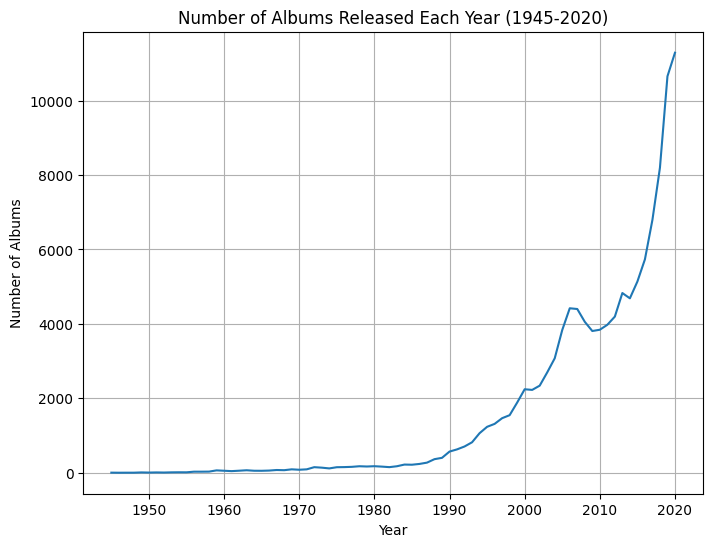

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(years, albumCountsArr)  
plt.title('Number of Albums Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Albums')
plt.grid(True)

In [22]:
def countSongsForGivenYear(year):
    countSongsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    albumCount = countSongsSpecificYear.groupBy("id").count().count()
    return albumCount

SongCountsArr = []
years = list(range(1945, 2021))
for year in years:
    count = countSongsForGivenYear(year)
    SongCountsArr.append(count)

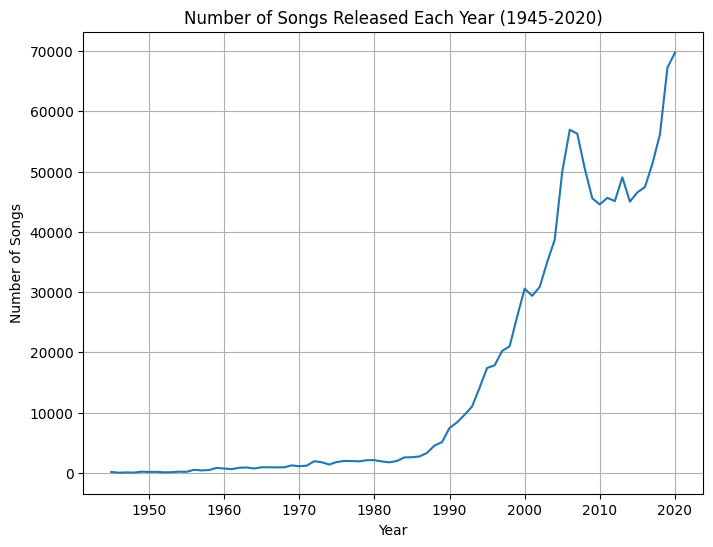

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(years, SongCountsArr)  
plt.title('Number of Songs Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)

In [24]:
def meanEnergyForGivenYear(year):
    songsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    meanEnergy = songsSpecificYear.select(mean("energy")).collect()[0][0]
    return meanEnergy

meanEnergyArr = []
years = list(range(1945, 2021))
for year in years:
    meanEnergy = meanEnergyForGivenYear(year)
    meanEnergyArr.append(meanEnergy)

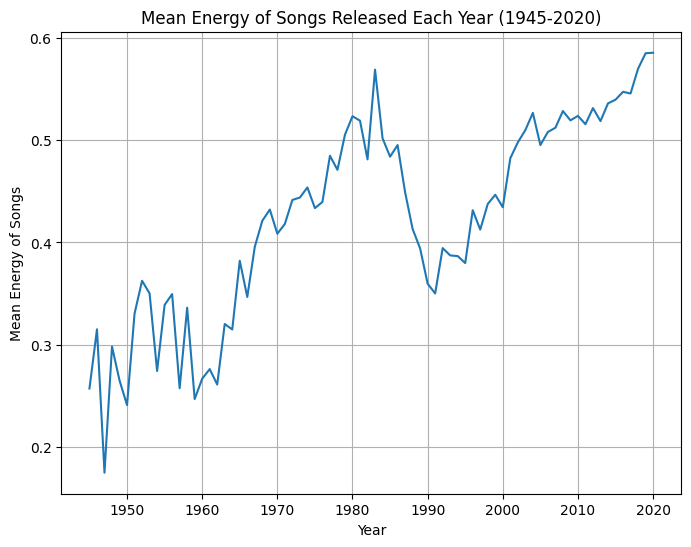

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(years, meanEnergyArr)  
plt.title('Mean Energy of Songs Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Mean Energy of Songs')
plt.grid(True)

In [26]:
sortedIndices = np.argsort(meanEnergyArr)
maxIndices = sortedIndices[-5:]
maxIndicesDescending = maxIndices[::-1]

print("Years with highest mean Energy:")
for inx in maxIndicesDescending:
    print(years[inx])

Years with highest mean Energy:
2020
2019
2018
1983
2016


In [27]:
def meanDanceabilityForGivenYear(year):
    songsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    meanDanceability = songsSpecificYear.select(mean("danceability")).collect()[0][0]
    return meanDanceability

meanDanceArr = []
years = list(range(1945, 2021))
for year in years:
    meanDanceability = meanDanceabilityForGivenYear(year)
    meanDanceArr.append(meanDanceability)

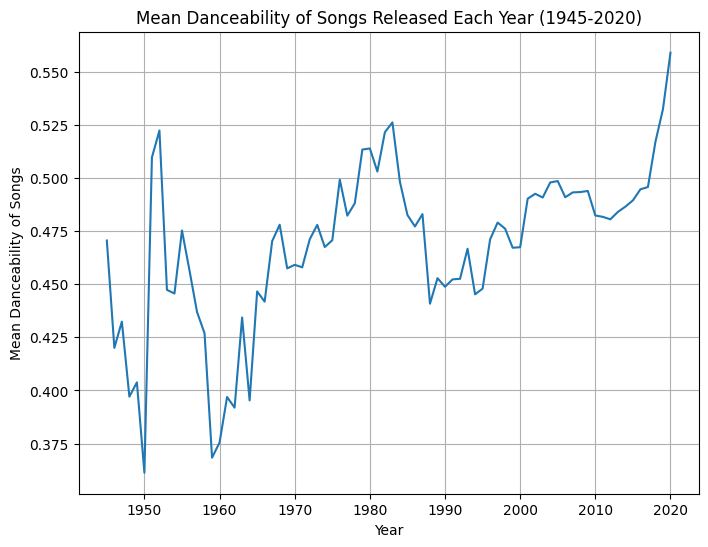

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(years, meanDanceArr)  
plt.title('Mean Danceability of Songs Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Mean Danceability of Songs')
plt.grid(True)

In [29]:
sortedIndices = np.argsort(meanDanceArr)
maxIndices = sortedIndices[-5:]
maxIndicesDescending = maxIndices[::-1]

print("Years with highest mean Danceability:")
for inx in maxIndicesDescending:
    print(years[inx])

Years with highest mean Danceability:
2020
2019
1983
1952
1982


In [30]:
def meanLoudnessForGivenYear(year):
    songsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    meanLoudness = songsSpecificYear.select(mean("loudness")).collect()[0][0]
    return meanLoudness

meanLoudnessArr = []
years = list(range(1945, 2021))
for year in years:
    meanLoudness = meanLoudnessForGivenYear(year)
    meanLoudnessArr.append(meanLoudness)

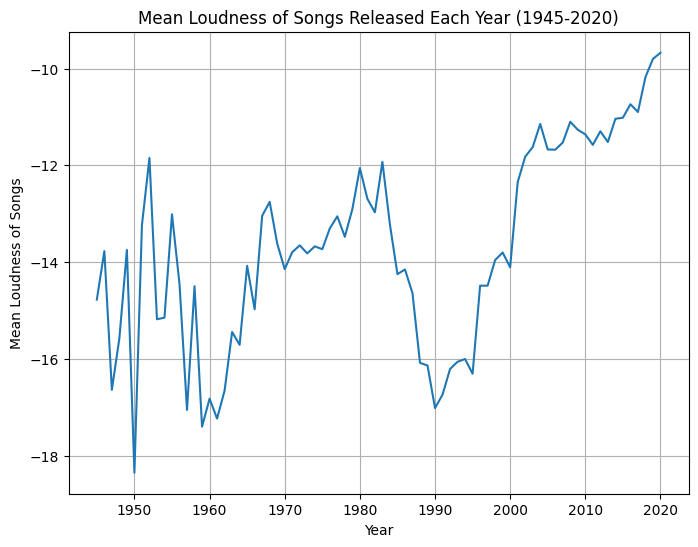

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(years, meanLoudnessArr)  
plt.title('Mean Loudness of Songs Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Mean Loudness of Songs')
plt.grid(True)

In [32]:
sortedIndices = np.argsort(meanLoudnessArr)
maxIndices = sortedIndices[-5:]
maxIndicesDescending = maxIndices[::-1]

print("Years with highest mean Loudness:")
for inx in maxIndicesDescending:
    print(years[inx])

Years with highest mean Loudness:
2020
2019
2018
2016
2017


In [33]:
def meanSpeechinessForGivenYear(year):
    songsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    meanSpeechiness = songsSpecificYear.select(mean("speechiness")).collect()[0][0]
    return meanSpeechiness

meanSpeechinessArr = []
years = list(range(1945, 2021))
for year in years:
    meanSpeechiness = meanSpeechinessForGivenYear(year)
    meanSpeechinessArr.append(meanSpeechiness)

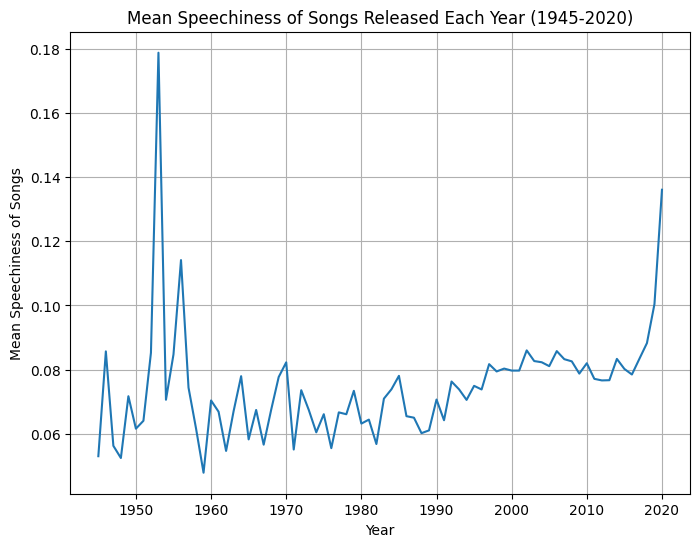

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(years, meanSpeechinessArr)  
plt.title('Mean Speechiness of Songs Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Mean Speechiness of Songs')
plt.grid(True)

In [35]:
sortedIndices = np.argsort(meanSpeechinessArr)
maxIndices = sortedIndices[-5:]
maxIndicesDescending = maxIndices[::-1]

print("Years with highest mean Speechiness:")
for inx in maxIndicesDescending:
    print(years[inx])

Years with highest mean Speechiness:
1953
2020
1956
2019
2018


In [36]:
def meanAcousticnessForGivenYear(year):
    songsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    meanAcousticness = songsSpecificYear.select(mean("acousticness")).collect()[0][0]
    return meanAcousticness

meanAcousticnessArr = []
years = list(range(1945, 2021))
for year in years:
    meanAcousticness = meanAcousticnessForGivenYear(year)
    meanAcousticnessArr.append(meanAcousticness)

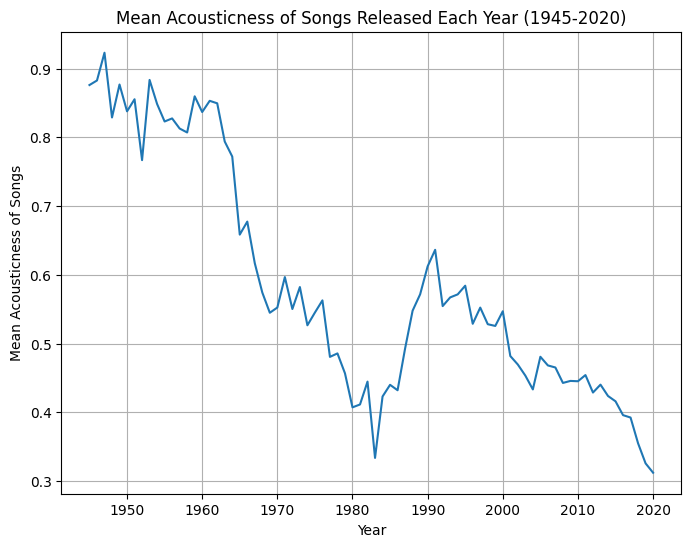

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(years, meanAcousticnessArr)  
plt.title('Mean Acousticness of Songs Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Mean Acousticness of Songs')
plt.grid(True)

In [38]:
sortedIndices = np.argsort(meanAcousticnessArr)
maxIndices = sortedIndices[-5:]
maxIndicesDescending = maxIndices[::-1]

print("Years with highest mean Acousticness:")
for inx in maxIndicesDescending:
    print(years[inx])

Years with highest mean Acousticness:
1947
1953
1946
1949
1945


In [39]:
def meanInstrumentalnessForGivenYear(year):
    songsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    meanInstrumentalness = songsSpecificYear.select(mean("instrumentalness")).collect()[0][0]
    return meanInstrumentalness

meanInstrumentalnessArr = []
years = list(range(1945, 2021))
for year in years:
    meanInstrumentalness = meanInstrumentalnessForGivenYear(year)
    meanInstrumentalnessArr.append(meanInstrumentalness)

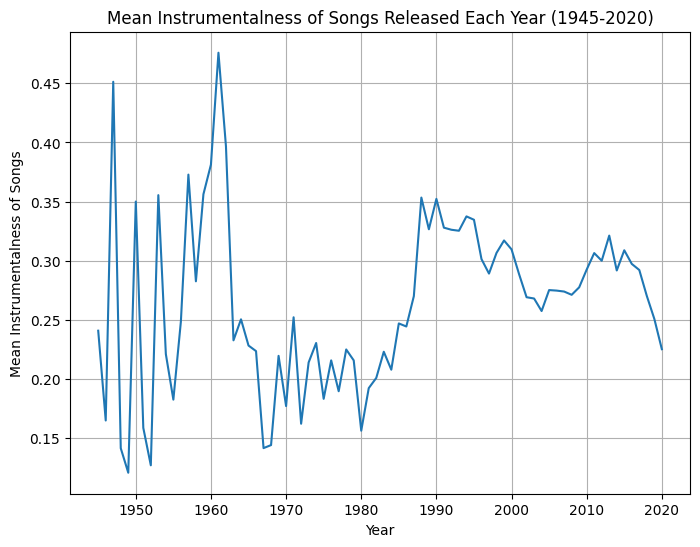

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(years, meanInstrumentalnessArr)  
plt.title('Mean Instrumentalness of Songs Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Mean Instrumentalness of Songs')
plt.grid(True)

In [41]:
sortedIndices = np.argsort(meanInstrumentalnessArr)
maxIndices = sortedIndices[-5:]
maxIndicesDescending = maxIndices[::-1]

print("Years with highest mean Instrumentalness:")
for inx in maxIndicesDescending:
    print(years[inx])

Years with highest mean Instrumentalness:
1961
1947
1962
1960
1957


In [42]:
def meanLivenessForGivenYear(year):
    songsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    meanLiveness = songsSpecificYear.select(mean("liveness")).collect()[0][0]
    return meanLiveness

meanLivenessArr = []
years = list(range(1945, 2021))
for year in years:
    meanLiveness = meanLivenessForGivenYear(year)
    meanLivenessArr.append(meanLiveness)

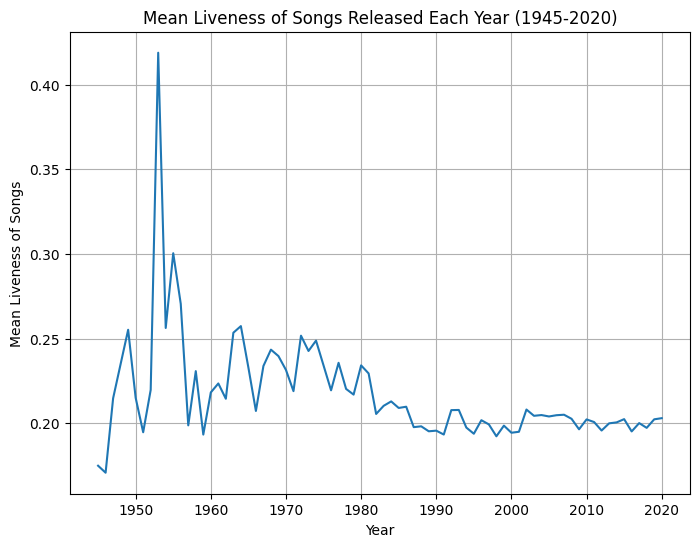

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(years, meanLivenessArr)  
plt.title('Mean Liveness of Songs Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Mean Liveness of Songs')
plt.grid(True)

In [44]:
sortedIndices = np.argsort(meanLivenessArr)
maxIndices = sortedIndices[-5:]
maxIndicesDescending = maxIndices[::-1]

print("Years with highest mean Liveness:")
for inx in maxIndicesDescending:
    print(years[inx])

Years with highest mean Liveness:
1953
1955
1956
1964
1954


In [45]:
def meanValenceForGivenYear(year):
    songsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    meanValence = songsSpecificYear.select(mean("valence")).collect()[0][0]
    return meanValence

meanValenceArr = []
years = list(range(1945, 2021))
for year in years:
    meanValence = meanValenceForGivenYear(year)
    meanValenceArr.append(meanValence)

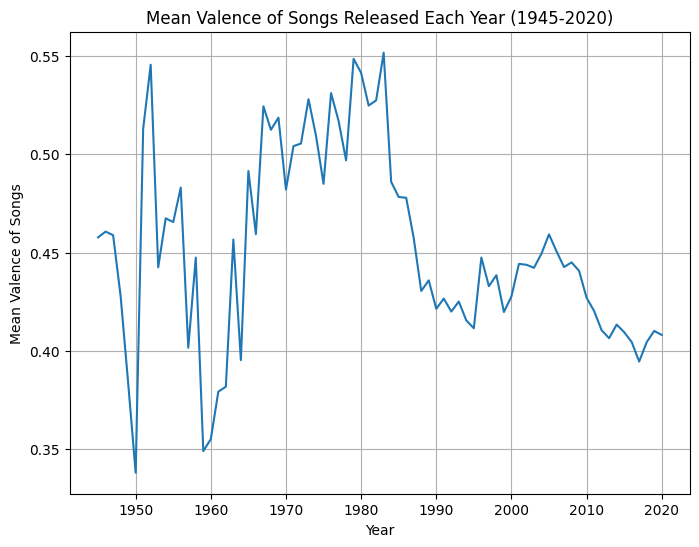

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(years, meanValenceArr)  
plt.title('Mean Valence of Songs Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Mean Valence of Songs')
plt.grid(True)

In [47]:
sortedIndices = np.argsort(meanValenceArr)
maxIndices = sortedIndices[-5:]
maxIndicesDescending = maxIndices[::-1]

print("Years with highest mean Valence:")
for inx in maxIndicesDescending:
    print(years[inx])

Years with highest mean Valence:
1983
1979
1952
1980
1976


In [48]:
def meanTempoForGivenYear(year):
    songsSpecificYear = spotifyDataFrame.filter(col("year") == year)
    meanTempo = songsSpecificYear.select(mean("tempo")).collect()[0][0]
    return meanTempo

meanTempoArr = []
years = list(range(1945, 2021))
for year in years:
    meanTempo = meanTempoForGivenYear(year)
    meanTempoArr.append(meanTempo)

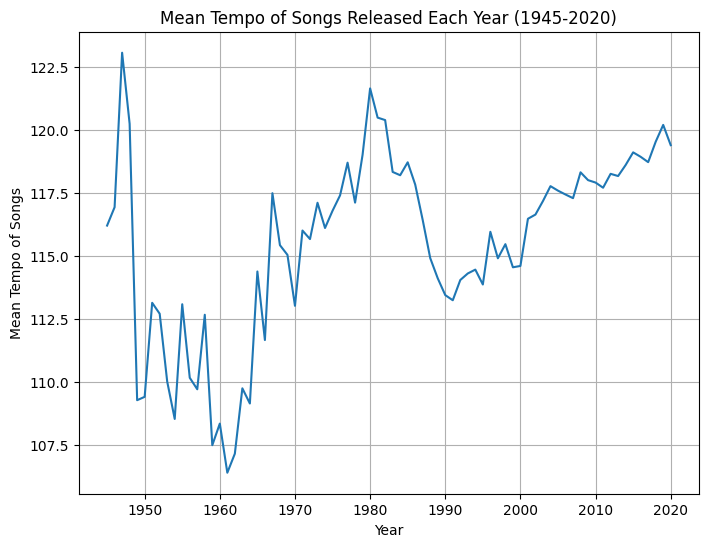

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(years, meanTempoArr)  
plt.title('Mean Tempo of Songs Released Each Year (1945-2020)')
plt.xlabel('Year')
plt.ylabel('Mean Tempo of Songs')
plt.grid(True)

In [50]:
sortedIndices = np.argsort(meanTempoArr)
maxIndices = sortedIndices[-5:]
maxIndicesDescending = maxIndices[::-1]

print("Years with highest mean Tempo:")
for inx in maxIndicesDescending:
    print(years[inx])

Years with highest mean Tempo:
1947
1980
1981
1982
1948


In [51]:
print("Number of rows:", spotifyDataFrame.count())

Number of rows: 1204025


In [52]:
spotifyDataFrame = spotifyDataFrame.withColumn("artist_ids_array", split(col("artist_ids"), ",")) \
                       .withColumn("artists_array", split(col("artists"), "&"))

spotifyDataFrame = spotifyDataFrame.withColumn("artist_id", explode(col("artist_ids_array"))) \
                       .withColumn("artist", explode(col("artists_array"))) \
                       .drop("artist_ids", "artists", "artist_ids_array", "artists_array")

In [53]:
displayDataFrame(spotifyDataFrame)

Number of rows: 1837552
First few rows:
+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------+---+-------------------+----+-----------+-----------------+--------------------+--------+------------------+------------------+-----------+--------------+----+----------------------+--------------------+--------------------+
|                  id|                name|               album|            album_id|track_number|disc_number|explicit|      danceability|energy|key|           loudness|mode|speechiness|     acousticness|    instrumentalness|liveness|           valence|             tempo|duration_ms|time_signature|year|release_date_converted|           artist_id|              artist|
+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------+---+-------------------+----+-----------+-----------------+----------------

In [54]:
print("Number of rows:", spotifyDataFrame.count())
spotifyDataFrame.printSchema()

Number of rows: 1837552
root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date_converted: date (nullable = true)
 |-- artist_id: string (nullable = false)
 |-- artist: string (nullable = false)



In [55]:
from pyspark.sql.functions import count

topArtistsWithHighestNumberOfSongs = (spotifyDataFrame
                .groupBy("artist")
                .agg(count("*").alias("song_count"))
                .orderBy(desc("song_count"))
                .limit(10)
                .select("artist", "song_count")
              )

displayDataFrame(topArtistsWithHighestNumberOfSongs)

Number of rows: 10
First few rows:
+--------------------+----------+
|              artist|song_count|
+--------------------+----------+
| ['Various Artists']|      1753|
|['Vitamin String ...|      1577|
|['Sergei Prokofie...|      1302|
| ['Aretha Franklin']|      1209|
|['Giuseppe Verdi'...|      1150|
|['The City of Pra...|      1042|
|['Frédéric Chopin...|      1020|
|["Dan Gibson's So...|       997|
|['Johann Sebastia...|       994|
|['Richard Wagner'...|       987|
+--------------------+----------+



# <span style="color:Pink">Questions: </span>

### <span style="color:Pink">1. Read about how Spark and Hadoop work. What does the term ‘lazy evaluation’ mean for them? Explain with a simple example.</span>

Spark and Hadoop are both frameworks for processing big data, but they have different ways of doing it.

Hadoop:
- Hadoop processes data in batches, dividing it into smaller parts and processing them across multiple computers using a model called MapReduce.
- It stores data in a distributed file system called HDFS, which ensures data safety and availability by replicating it across computers.

Spark:
- Spark is a newer and faster framework that can handle batch processing, streaming, machine learning, and graph processing.
- It uses in-memory computing, meaning it can store data in memory across computers, reducing the need to access disk storage.
- Spark introduces RDDs, which are collections of data that can be processed across computers. RDDs can come from various sources like HDFS, Hive, or other RDDs.

Lazy Evaluation:
- Spark uses lazy evaluation, which means it doesn't immediately execute operations on data. Instead, it creates a plan of operations and executes them only when needed.
- This helps Spark optimize how it processes data by rearranging or combining operations before executing them, leading to better performance.

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("LazyExample").getOrCreate()
data = spark.range(10)
filtered = data.filter(data.id % 2 == 0) 
doubled = filtered.map(lambda x: x * 2)   
result = doubled.collect()  
print(result) 
```

In this example:
1. We create a range DataFrame `data` with values from 0 to 9.
2. We apply two transformations: `filter` to keep only even numbers, and `map` to double the values. However, no actual computations have been performed yet.
3. When we call the `collect()` action, it triggers the execution of the entire transformation pipeline (`filter` and `map`) on the DataFrame.
4. The final result `[0, 4, 8, 12, 16]` is printed, showing the even numbers from the original DataFrame doubled.

### <span style="color:Pink">2. Your main task’s dataset has about 1,200,000 rows, which makes it quite hard, and even sometimes impossible, to work with. Explain how parquet files try to solve this problem, compared to normal file formats like csv.</span>

When working with large datasets, traditional file formats like CSV can become inefficient, especially when dealing with millions of rows. This is where columnar file formats like Parquet come into play, offering several advantages over row-based formats like CSV.

Parquet is an open-source columnar storage format designed to be efficient for storing and processing large amounts of data in a compressed and optimized manner. It is widely used in big data processing frameworks like Apache Spark and Apache Hadoop.

Here are some key advantages of using Parquet files over CSV files when working with large datasets:

1. **Compression**: Parquet files are compressed using efficient compression algorithms like Snappy or GZIP, reducing file sizes and improving data transfer times.

2. **Columnar storage**: Parquet stores data in a columnar format, enabling efficient processing of queries that require only a subset of columns.

3. **Predicate pushdown**: Parquet stores metadata about the data, allowing query engines to apply filters before reading the actual data, reducing the amount of data processed.

4. **Efficient data encoding**: Parquet supports various data encoding techniques, such as dictionary encoding for strings and run-length encoding for repeated values, reducing storage requirements.

5. **Parallelism**: Parquet files are designed to be split into multiple row groups, allowing for parallel processing and efficient distribution across multiple nodes.

6. **Schema evolution**: Parquet supports schema evolution, enabling the addition of new columns without rewriting the entire file.

While Parquet files offer significant advantages for large datasets, they may not be the best choice for every use case. For example, if you need to frequently update or append data, CSV files may be more suitable due to their simpler structure and easier modifiability.

### <span style="color:Pink">3. As you might have noticed, Spark doesn’t save checkpoints. How can we enforce it to do so? This can help us if we have multiple computation steps and we don’t want to wait a lot for the result.</span>

To enforce Spark to save checkpoints, we can use the `checkpoint()` method on our RDD or DataFrame. This method allows us to specify a directory where Spark will save checkpoint data. Checkpoints are particularly useful when you have multiple computation steps and want to avoid waiting a long time for the result, as they help in fault tolerance and performance optimization.

Here's how we can use the `checkpoint()` method:

```python
spark.sparkContext.setCheckpointDir("path/to/checkpoint/directory")
result = data.someTransformation().checkpoint()
result.collect()
```

By calling `checkpoint()` on our RDD or DataFrame, Spark will save intermediate results to the checkpoint directory specified. This can help in speeding up subsequent computations and making our workflow more resilient to failures.

### <span style="color:Pink">4. Top companies stream their data on a regular routine, e.g. daily. How can we save data, so that we could filter it based on specific columns, e.g. date, faster than regular filtering?</span>

One efficient approach to saving and filtering streamed data based on specific columns such as date is to utilize a database management system (DBMS) optimized for querying. Here are steps to achieve faster filtering:

1. **Choose a Suitable DBMS**: Opt for a DBMS that supports indexing and is designed for fast querying. Examples include PostgreSQL, MySQL, or Apache Cassandra.

2. **Database Schema Design**: Design an efficient database schema that organizes data into tables, with appropriate indexing on columns that are frequently used for filtering, such as the date column in this case.

3. **Use Indexing**: Index the columns that are commonly filtered. For example, create an index on the date column to speed up date-based queries.

4. **Partitioning**: If dealing with large volumes of data, consider partitioning the data based on time intervals (e.g., daily partitions). This can help in faster querying as it limits the scope of data to be searched.

5. **Query Optimization**: Write efficient queries that leverage the indexing and partitioning strategy. Use query hints or optimizer hints if supported by the DBMS to guide the query execution.

6. **Regular Maintenance**: Regularly monitor and optimize the database performance by re-indexing, updating statistics, and optimizing queries based on changing data patterns and query requirements.


### <span style="color:Pink">5. Let's face off Pandas and PySpark in the data analysis arena! When does each library truly shine, and why Consider factors like data size, processing complexity, and user experience.</span>

**Pandas:**

1. **Data Size**: Pandas shines when dealing with smaller to medium-sized datasets that can fit into memory on a single machine. It's optimized for such scenarios, providing fast and efficient data manipulation capabilities.
   
2. **Processing Complexity**: For relatively straightforward data processing tasks and exploratory data analysis (EDA), Pandas offers an intuitive and user-friendly interface. Its rich set of functions and data structures make it easy to clean, transform, and visualize data.

3. **User Experience**: Pandas provides a seamless user experience for data analysts and scientists. Its syntax is straightforward and Pythonic, making it accessible even to those with limited programming experience. Additionally, its integration with other Python libraries like NumPy and Matplotlib enhances its usability for various data analysis tasks.

**PySpark:**

1. **Data Size**: PySpark truly shines when dealing with large-scale datasets that exceed the memory capacity of a single machine. It leverages distributed computing across clusters of machines, enabling the processing of massive datasets efficiently.

2. **Processing Complexity**: PySpark is well-suited for handling complex data processing tasks, including advanced analytics, machine learning, and real-time streaming analysis. Its parallel and distributed processing capabilities make it ideal for tasks that require intensive computation.

3. **User Experience**: While PySpark offers powerful capabilities for big data processing, its learning curve can be steeper compared to Pandas. Users need to be familiar with concepts like distributed computing and Spark's API. However, once users become proficient, PySpark provides a robust and scalable platform for data analysis.

**Summary:**

- **Pandas**: Best suited for smaller to medium-sized datasets, simpler processing tasks, and users seeking an intuitive and easy-to-use interface.
  
- **PySpark**: Ideal for large-scale datasets, complex processing tasks, and users requiring scalability and distributed computing capabilities.